# pandas 入门

- 官方文档中强调，Pandas 项目名称中的字母应全部小写，且导入程序库的语句为：`import pandas as pd`
- Pandas 起初是被作为金融数据分析工具开发出来的，其名称来源于面板数据(Panel Data)和Python 数据分析(Data Analysis)，Panel Data 是经济学中关于多维数据集的一个术语
- 支持绝大部分NumPy风格的数组计算，不同的是，NumPy用于处理同质性的数值类型数组数据，而pandas是用来处理表格型或异质型数据的

1. 数据结构     
    1. `pandas.Series(data, index, dtype, name, copy)`          -> 一维数组
    2. `pandas.DataFrame(data, index, colume, dtype, copy)`     -> 二维数组
    3. `pandas.Panel(data=None, items=None, major_axis=None, minor_axis=None, copy=False, dtype=None)`  -> 三维数组
2. 基本功能
    1. 重建索引
    2. 轴向上删除条目
    3. 索引、选择与过滤
    4. 运算、数据对齐
        1. 使用填充值的算术方法
        2. DataFrame和Series间的操作
    5. 函数应用和映射
    6. 排序和排名
    7. 含有重复标签的轴索引
3. 描述性统计的概述与计算
4. 数据的输入与输出
    1. 处理***CSV、JSON文件***
    2. 《Python for Data Analysis(Second Edition)》
5. 数据清洗
    1. 删除空值
    2. 替换空值
    3. 清洗格式错误的数据
        1. 格式化日期
        2. 更改错误年龄
        3. 删除重复数据
6. 数据规整：连接、联合与重塑
    1. 分层索引
        1. 重排序和层级排序
        2. 按层级进行汇总统计
        3. 使用DataFrame的列进行索引
    2. 联合与合并数据集
        1. 数据库风格的DataFrame连接
        2. 根据索引合并
        3. 沿轴向连接
        4. 联合重叠数据
    3. 重塑和透视
        1. 使用多层索引进行重塑
        2. 将“长”透视为“宽”
        3. 将“宽”透视为“长” 
7. 数据聚合与分组操作
    - 《Python for Data Analysis(Second Edition)》
8. 绘图与可视化
    1. 图片与子图
    2. 使用pandas和seaborn绘图
    3. 直方图和密度图
    4. 散点图或点图
    5. 分面网络和分类数据
    6. 其他Python可视化工具
9. 时间序列
    - 《Python for Data Analysis(Second Edition)》
10. pandas高级应用
    - 《Python for Data Analysis(Second Edition)》

# 一、 数据结构     

## 1.Series()

`pandas.Series(data, index, dtype, name, copy)`

将数据展开成带索引值的一列

<font color='red'>参数说明：</font>

> - data：一组数据(ndarray 类型)
>
> - index：数据索引标签，如果不指定，默认从 0 开始。
>
> - dtype：数据类型，默认会自己判断
>
> - name：设置名称
>
> - copy：拷贝数据，默认为 False

In [1]:
import pandas as pd

a = ['Alex', 'Bob', 'Clara']
my_var = pd.Series(a, index=[1, 2, 3])

sites = {1: "Google", 2: "Runoob", 3: "Wiki"}
myvar = pd.Series(sites, index = [1, 2], name="RUNOOB-Series-TEST" )    # 若只需要字典的部分值，则在索引值中指定范围


print(my_var, '\n')
print(myvar)


1     Alex
2      Bob
3    Clara
dtype: object 

1    Google
2    Runoob
Name: RUNOOB-Series-TEST, dtype: object


In [2]:
# 可以认为Series是一个长度固定且有序的字典
import pandas as pd

sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj = pd.Series(sdata)
print(obj)

# 将字典的值按理想的键值排序
states = ['California', 'Oregon', 'Texas', 'Ohio', 'Utah']
obj = pd.Series(sdata, index=states)
print('\n重新排序后的字典：\n', obj)
print('\n检查缺失的数据：\n', pd.isnull(obj))       # 还可以用'pd.notnull(obj)'，isnull和notnull也是Series中的实例方法: obj.isnull


Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

重新排序后的字典：
 California        NaN
Oregon        16000.0
Texas         71000.0
Ohio          35000.0
Utah           5000.0
dtype: float64

检查缺失的数据：
 California     True
Oregon        False
Texas         False
Ohio          False
Utah          False
dtype: bool


## 2.DataFrame()
`pandas.DataFrame( data, index, columns, dtype, copy)`

DataFrame 是一个矩阵的数据表，它含有一组有序的列，每列可以是不同的值类型（数值、字符串、布尔值等）。DataFrame 既有行索引也有列索引，它可以被看做由 Series 组成的字典（共同用一个索引），可用**分层索引**展现更高维度的数据

<font color='red'>参数说明：</font>

> - data：一组数据(ndarray、series, map, lists, dict 等类型)
>
> - index：索引值，或者可以称为行标签
>
> - columns：列标签，默认为 RangeIndex (0, 1, 2, …, n) 
>
> - dtype：数据类型
>
> - copy：拷贝数据，默认为 False

<font color='yellow'>从DataFrame中选区的列是数据的视图，而不是拷贝。对Series的修改会映射到DataFrame中去</font>

### ①基本构造及属性

|类型|注释|
|:---:|:---:|
|2D ndarray|数据的矩阵，行和列的标签是可选的参数|
|数组、列表和元组构成的字典|每个序列成为DataFrame的一列，所有的序列必须长度相等|
|NumPy结构化/记录化数组|与数组构成的字典一致|
|Series构成的字典|每个值成为一列，每个Series的索引联合起来形成结果的行索引，也可以显式地传递索引|
|字典构成的字典|每一个内部字典成为一列，键联合起来形成结果的行索引|
|字典或Series构成的列表|列表中的一个元素形成DataFrame的一行，字典键或Series索引联合起来形成DataFrame的列标签|
|列表或元组构成的列表|与2D ndarray的情况一致|
|其他DataFrame|如果不显示传递索引，则会使用原DataFrame的索引|
|NumPy MakesArray|与2D ndarray的情况类似，但隐藏值会在结果DataFrame中成为NA/缺失值|

In [3]:
import pandas as pd

data = [['Google',1],['Baidu',2],['Wiki',3]]
df = pd.DataFrame(data,columns=['Site','Age'] )

print(df)

     Site  Age
0  Google    1
1   Baidu    2
2    Wiki    3


In [ ]:
# 常见的是利用多个同等长度的列表或NumPy数组组成的字典形成 DataFrame
import pandas as pd

data = {'name': ['Alex', 'Bob', 'Charlie', 'Dave', 'Emily'],
        'birth': [2001, 2000, 1989, 2001, 2003],
        'score': [96., 97.8, 99, 94., 90.3]}
frame = pd.DataFrame(data)
print(frame)
print('\n重新排序过的表格：\n', pd.DataFrame(data, columns=['name', 'score', 'birth']))
frame2 = pd.DataFrame(data, columns=['name', 'score', 'birth', 'gender'], index=['one', 'two', 'three', 'four', 'five'])
print('\n未初始化键值的指定列下会出现缺失值：\n',frame2)

# 可以按字典型标记或属性那样检索为：Series
print('\n检索姓名：\n', frame2['name'])
print('\n检索分数：\n', frame2.score)
# 通过位置或特殊属性进行选取
print('\n位置\'three\'索引：\n', frame2.loc['three'])

# 如果将Series赋值给一列时，Series的索引将会按照DataFrame的索引重新排列，并在空缺的地方填充缺失值
val = pd.Series(['F', 'M', 'M'], index=['five', 'one', 'two'])
frame2['gender'] = val
print('\n补充上空缺值后：\n', frame2)

del frame2['birth']
print('\n删除生日一列后：\n', frame2)


In [ ]:
# 嵌套字典
import pandas as pd

nestedDict = {'Nevada': {2001: 2.4, 2002: 2.9}, 'Ohio': {2000: 1.5, 2002: 1.7, 2004: 3.6}}
frame3 = pd.DataFrame(nestedDict)
print('\n原始的列表：\n', frame3)

print('\n转置后的列表：\n', frame3.T)

pdata = {'Ohio': frame3['Ohio'][:-1], 'Nevada': frame3['Nevada'][:2]}
print('\n', pd.DataFrame(pdata))

### ②索引对象

|方法|描述|
|:---:|:---:|
|append|将额外的索引对象粘贴到原数据结构中后，产生一个新的索引|
|diffarance|计算两索引的差集|
|intersection|计算两索引的交集|
|union|计算两索引的并集|
|isin|计算表示每一个值是否在传值容器中的布尔数组|
|delete|将位置i的元素删除，并产生新的索引|
|drop|根据传参删除指定索引值，并产生新的索引|
|insert|在位置i插入元素，并产生新的索引|
|is_monotonic|如果索引序列递增的话返回True|
|is_unique|如果索引序列惟一的话返回True|
|unique|计算索引的唯一值序列|

In [ ]:
import pandas as pd
import numpy as np

obj = pd.Series(range(3), index=['a', 'b', 'c'])
index = obj.index
print(index[1:])

# 索引对象不可变，因此用户不可修改；但根据索引对象可以修改对应的值
# 不变性使得在多种数据结构中分享索引对象更安全
labels = pd.Index(np.arange(3))
obj1 = pd.Series([1.5, -1, 0], index=labels)
print("labels is obj1.index: ", labels is obj1.index)

# 与Python集合不同，pandas索引可以包含重复标签
dup_labels = pd.Index(['Apple', 'Banana', 'Apple', 'Pear'])
print(dup_labels)

## 3.Panel()

`pandas.Panel(data=None, items=None, major_axis=None, minor_axis=None, copy=False, dtype=None)`

`pandas.Panel()` represents wide format panel data, stored as 3-dimensional array

<font color='red'>参数说明：</font>

> - data : ndarray (items x major x minor), or dict of DataFrames
>
> - tems : Index or array-like
    axis=0
    major_axis : Index or array-like
    axis=1
    minor_axis : Index or array-like
    axis=2
>
> - dtype : dtype, default None
>
> - Data type to force, otherwise infer
>
> - copy : boolean, default False
>
> - Copy data from inputs. Only affects DataFrame / 2d ndarray input

- 详见[官方文档](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.Panel.html)

# 二、基本功能

## 1.重建索引

`obj.reindex(index, method, fill_value, limit, tolerance, level, copy)` 

用于创建一个个符合新索引的新对象。

<font color='red'>参数说明如下：</font>

> 
> - index: 新建作为索引的序列，可以是索引实例或任意其他序列型Python数据结构，索引使用时无需复制
>
> - method: 插值方式，'ffill'为前向填充，'bfill'是后向填充
>
> - limit: 当前向或后向填充时，所需填充的最大尺寸间隙（以元素数量）
>
> - tolerance: 当前向或后向填充时，所需填充的不精确匹配下的最大尺寸间隙（以绝对数字距离）
>
> - level: 匹配MultiIndex级别的简单索引；否则选择子集
>
> - copy: 如果为True，即使新索引等于旧索引，也总是复制底层数据；如果是False，则在索引相同时不要复制数据
>

In [ ]:
import pandas as pd

obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
print("obj2按照新的顺序排列后：\n", obj2)           # 即改变行索引

obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
print("\nobj3数据对象如下所示：\n", obj3)
print("\nobj3数据对象插值后如下所示：\n", obj3.reindex(range(6), method='ffill'))

# 既可以改变行索引，也可以改变列索引
obj3 = pd.DataFrame(np.arange(9).reshape((3, 3)), index=['a', 'c', 'd'], columns=['number', 'color', 'level'])
print("\nobj3数据对象重置后如下所示：\n", obj3)
frame = obj3.reindex(columns=['number', 'Like', 'color'])
print("\nobj3数据对象改变列索引后如下所示：\n", frame)
print("\nobj3数据对象改变行索引后如下所示：\n", obj3.reindex(['a', 'b', 'c', 'd']))


## 2.轴向上删除条目

`drop()`方法会返回一个含有指示值或轴向上删除值的新对象

In [ ]:
import pandas as pd

data = pd.DataFrame(np.arange(16).reshape((4, 4)), 
                    index=['Ohio', 'Colorado', 'Utah', 'New York'], 
                    columns=['one', 'two', 'three', 'four'])
print(data)

# 在调用drop时使用“标签序列”会根据行标签删除值（轴0）
print("\n调用drop方法删除之后：\n", data.drop(['Colorado', 'Ohio']))
print("\n沿轴1，即\'axis=1\'或\'axis=columns\'：\n", data.drop('two', axis=1))

# 该方法都是直接在源对象上操作，而不返回新对象；📢注意：inplace会清除被删除的数据
data.drop(['New York'], inplace=True)

## 3.索引、选择与过滤

- 索引（详见1.2“索引对象”）
    - 普通索引（键值索引）
    - 切片索引
    - 条件索引
- 选择（行标签索引）
    - `.loc[]` 
    - `.iloc()`
- 过滤（索引+切片）

|类型|描述|
|:---:|:---:|
|df[val]|从DataFrame中选择单列或列序列；特殊情况的便利：布尔数组（过滤行），切片（切片行）或布尔值DataFrame|
|df.loc[val]|根据标签选择DataFrame的单行或多行|
|df.loc[:, val]|根据标签选择单列或多列|
|df.loc[val1, val2]|同时选择行和列的一部分|
|df.iloc[where]|根据整数位置选择单行或多行|
|df.iloc[:, where]|根据整数位置选择单列或多列|
|df.iloc[where_i, where_j]|根据整数位置选择行和列|
|df.at[label_i, label_j]|根据行、列标签选择单个标量值|
|df.iat[i, j]|根据行、列整数位置选择单个标量值|
|reindex方法|通过标签选择行或列|
|get_value, set_value|根据行和列的标签设置单个值|

In [ ]:
import pandas as pd
import numpy as np

""" 索引 """
obj = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
data = pd.DataFrame(np.arange(16).reshape((4, 4)), 
                    index=['Ohio', 'Colorado', 'Utah', 'New York'], 
                    columns=['one', 'two', 'three', 'four'])

# 普通的Python切片是不包含尾部的，但Series不一样
print(obj['b':'c'], '\n')
# 键值索引
print(data[['three', 'one']], '\n')
# 条件索引
print(data[data['three']>5], '\n')

""" 选择 """
print(data.loc['Colorado', ['two', 'three']], '\n')
print(data.iloc[2, [3, 0, 1]], '\n')      # 以NumPy的语言风格选择——先选轴0，再选轴1（就是将二维数组降维分别选择）

""" 过滤 """
print(data.iloc[:, :3][data.three > 5])

## 4.运算、数据对齐

将两个对象相加时，如果存在某个索引对不相同，则返回结果的索引将是索引对的并集，这类似于索引标签的自动连接（outer join）。

In [ ]:
import pandas as pd

s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])

""" print("s1:\n", s1, '\n')
print("s2:\n", s2, '\n')
print("s1+s2:\n", s1+s2, '\n') """

data1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'), index=['Ohio', 'Texas', 'Colorado'])
data2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'), index=['Utah', 'Ohio', 'Texas', 'Oregon'])


print("data1:\n", data1, '\n')
print("data2:\n", data2, '\n')
print("data1+data2:\n", data1+data2, '\n') 

### ①使用填充值的算术方法

比如当轴标签在一个对象中存在，在另一个对象中不存在时，打算将缺失值填充为0

<font color='red'>算术方法：</font>

|方法|描述|
|:---:|:---:|
|add, radd|加法 `+`|
|sub, rsub|减法 `-`|
|div, rdiv|除法 `/`|
|floordiv, rfloordiv|整除 `//`|
|mul, rmul|乘法 `*`|
|pow, rpow|幂次方 `**`|

In [ ]:
import pandas as pd

df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)), columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)), columns=list('abcde'))

# 将 df2 上某位置的值改为NaN
df2.loc[1, 'b'] = np.nan
# 在 df1 上使用add方法，将 df2 和一个fill_value作为参数传入
print(df1.add(df2, fill_value=0))

# 也可以用fill_value传参重建df1的索引
df1.reindex(columns=df2.columns, fill_value=0)

### ②DataFrame和Series间的操作

<font color='yellow'>广播机制（broadcasting）</font>

In [ ]:
import pandas as pd

# 行匹配
arr = np.arange(12.).reshape((3, 4))
print('arr:\n', arr, '\n')
print('arr - arr[0]:\n', arr - arr[0], '\n')

# 列匹配
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)), 
                     columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
series = frame.iloc[0]
print('series: \n', series, '\n')
print('frame - series: \n', frame-series, '\n')

# 重建索引——：两数据结构不同时具有某索引标签
series2 = pd.Series(range(3), index=['b', 'e', 'f'])    # frame不具有'e'和'f'索引标签
# 在列上匹配：
series2 = frame['d']
# 在行上广播：
print('frame.sub(series2, axis=\'index\') -> \n', frame.sub(series2, axis='index'))

## 5.函数应用和映射

In [ ]:
import pandas as pd

# NumPy的通用函数（逐元素数组法）对pandas对象也有效
frame = pd.DataFrame(np.random.randn(4, 3), 
                     columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
np.abs(frame)   # 将frame中的所有元素都取其绝对值

# 将函数应用到一行或一列的一维数组上
f = lambda x: x.max() - x.min()
frame.apply(f)  # 计算frame的每一列中最大值减去最小值的差值
frame.apply(f, axis='columns')  # 在每列调用后的基础上，在每行都调用一遍 

# 根据frame中的每个浮点数计算一个格式化字符串
formatting = lambda x:'%.2f' % x
frame.applymap(formatting)

## 6.排序和排名

- `sort_index()` 返回一个新的、排序好的对象

- `rank()` 通过将平均排名分配到每个组来打破平级的关系，<font color='red'>参数如下：</font>

|方法|描述|
|:---:|:---:|
|average|默认：在小组中的平均排名|
|min|对整个组使用最小排名|
|max|对整个组使用最大排名|
|first|按照值在数据中出现的次序分配排名|
|dense|类似于"method=min"，但组间排名总是增加1，而不是一个组中的相等元素的数量|

In [ ]:
import pandas as pd

obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
frame = pd.DataFrame(np.random.randn(4, 3), 
                     columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])

""" 按轴标签排序 """
print('按轴标签排序-> obj默认按升序排序：\n', obj.sort_index())
# 在各个轴上排序，数据默认升序排序
print('\n按轴标签排序-> frame在轴1按降序排序：\n', frame.sort_index(axis=1, ascending=False))

""" 按值排序 """
print('\n按值排序-> 默认情况下NaN被排序至尾部：\n', obj.sort_values())
# 可以选择多列或一列作为排序键
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})   # 按数值大小分配排名
print('\n按值排序-> 选择某一列作为排序键：\n', frame.sort_values(by='b'))


""" rank()方法输出排序后的名次 """
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])
print("\n索引：名次\n", obj.rank())
# 将值分配给组中最大排名
obj.rank(ascending=False, method='max')
# DataFrame列排名
frame.rank(axis='columns')

## 7.含有重复标签的轴索引

- `is_unique()` 属性可以告诉你一个Series的标签是否唯一

In [ ]:
import pandas as pd

obj = pd.Series(range(5), index=['a', 'a', 'b', 'b', 'c'])
print('obj的索引唯一：', obj.index.is_unique)
print(obj['a'], '\n')     # 无重复索引的返回一个标量值，有重复索引值的返回一个序列

df = pd.DataFrame(np.random.randn(4, 3), index=['a', 'a', 'b', 'c'])
print(df.loc['b'])

# 三、描述性统计的概述与计算


## 1.归约方法

<font color='red'>可选参数如下：</font>

|方法|描述|
|:---:|:---:|
|axis|归约轴，0为行向，1为列向|
|skipna|排除缺失值，默认为True|
|level|如果轴是多层索引的（MultiIndex），该参数可以缩减分组层级|


In [5]:
import pandas as pd

""" 归约型方法 """
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                   index=['a', 'b', 'c', 'd'],
                   columns=['one', 'two'])
# 特此提醒：除非整列上都是NaN值，否则输出时NaN值是被自动排除的
print(df.sum(axis=1), '\n')       # 或 axis='columns'，将一行上各个列的值相加
# 可以通过禁用 skipna 来实现不排除NaN值
print(df.mean(axis='columns', skipna=False))


a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64 

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64


## 2.汇总统计

|方法|描述|
|:---:|:---:|
|count|非Na值的个数|
|describe|计算Series或DataFrame各列的汇总统计集合|
|min, max|计算最小值、最大值|
|argmin, argmax|分别计算最小值、最大值所在的索引位置（整数）|
|idmin, idmax|分别计算最小值或最大值的索引标签|
|quantile|计算样本的从0到1间的分位数|
|sum|加和|
|mean|均值|
|median|中位数（50%分位数）|
|mad|平均值的平均绝对偏差|
|prod|所有值的积|
|var|值的样本方差|
|std|值的样本标准差|
|skew|样本偏度（第三时刻）值|
|kurt|样本峰度（第四时刻）值|
|cumsum|累计值|
|cummin, cummax|累计值得最小值或最大值|
|cumprod|值的累计值|
|diff|计算第一个算术差值（对时间序列有用）|
|pct_change|计算百分比|

In [6]:
import pandas as pd
import numpy as np

df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                   index=['a', 'b', 'c', 'd'],
                   columns=['one', 'two'])
print(df.cumsum())

    one  two
a  1.40  NaN
b  8.50 -4.5
c   NaN  NaN
d  9.25 -5.8


## 3.相关性和协方差

In [ ]:
import pandas as pd
# import pandas_datareader as web     # 数据库源自Yahoo! Finance
""" November 1st, 2021 Yahoo\xe2\x80\x99s suite of services will no longer be accessible from mainland China.
这段代码摘自《Python for Data Analysis(Second Edition)》 雅虎数据库在中国大陆不能用了，故这一部分先空着，待到有实例代码了再完善
"""

## 4.唯一值、计数和成员属性

|方法|描述|
|:---:|:---:|
|isin|计算表征Series中每个值是否包含于传入序列的布尔值数组中|
|match|计算数组中每个值的整数索引，形成一个唯一值数组。有助于数据对齐和join类型的操作|
|unique|计算Series值中的唯一值数组，按照观察顺序返回|
|value_counts|返回一个Series，索引值是唯一值序列，值是计数个数，按照个数降序排序|

In [ ]:
import pandas as pd

obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c' ])
uniques = obj.unique()      # 返回唯一值索引标签
print("唯一值索引标签：", uniques, '\n')
print("唯一值索引标签个数：\n", obj.value_counts(), '\n')

# 过滤为值子集
mask = obj.isin(['b', 'c'])
print(mask, '\n')
print("过滤后的值子集为：\n", obj[mask], '\n')

# 将非唯一值数组转换成另一个唯一值数组
print("将非唯一值数组转换成另一个唯一值数组：\n", pd.Index(uniques).get_indexer(obj))

# 四、数据的输入和输出

数据的输入输出通常有这几种类型：<font color='yellow'>读取文本文件及硬盘上其他更高效的格式文件、从数据库载入数据、与网络资源进行交互（比如 Web API）</font>

1. 处理***CSV、JSON文件***

    - 详见【/Users/mac/Desktop/DS_Python/BasicStuff_Py/数据科学库/pandas初阶知识/CSV_JSON文件处理/Pandas_CSV_JSON.ipynb】

2. 《Python for Data Analysis(Second Edition)》

    - 详见【/Users/mac/Desktop/DS_Python/BasicStuff_Py/数据科学库/pandas初阶知识】

# 五、数据清洗

<font color='green'>其他·补充详见同级目录下的< 数据清洗与准备.ipynb ></font> -> 参考资料：《Python for Data Analysis(Second Edition)》

## 1.清洗空值 

如果我们要删除包含空字段的行，可以使用 dropna() 方法，并通过 isnull() 判断各个单元格是否为空。

`DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)`

<font color='red'>参数说明：</font>

> - axis：默认为 0，表示逢空值剔除整行，如果设置参数 axis＝1 表示逢空值去掉整列
>
> - how：默认为 ‘any’ 如果一行（或一列）里任何一个数据有出现 NA 就去掉整行，如果设置 how=‘all’ 一行（或列）都是 NA 才去掉这整行。
>
> - thresh：设置需要多少非空值的数据才可以保留下来的
>
> - subset：设置想要检查的列。如果是多个列，可以使用列名的 list 作为参数
>
> - inplace：如果设置 True，将计算得到的值直接覆盖之前的值并返回 None，修改的是源数据。



In [ ]:
import pandas as pd

#  Pandas 把 n/a 和 NA 当作空数据，na 不是空数据，不符合我们要求，我们可以指定空数据类型：
missing_values = ["n/a", "na", "--"]
df = pd.read_csv('property-data.csv', na_values = missing_values)

print (df['NUM_BEDROOMS'])
print (df['NUM_BEDROOMS'].isnull())



## 2.删除指定列有空值的行

In [ ]:
import pandas as pd

df = pd.read_csv('property-data.csv')
df.dropna(subset=['ST_NUM'], inplace = True)
print(df.to_string())


## 3.替换空字段

-  `fillna()` 方法来替换一些空字段。Pandas使用 mean()、median() 和 mode() 方法计算列的均值（所有值加起来的平均值）、中位数值（排序后排在中间的数）和众数（出现频率最高的数）

In [ ]:
import pandas as pd

df = pd.read_csv('property-data.csv')

x = df["ST_NUM"].mean()
df['PID'].fillna(12345, inplace = True)
df.fillna(12345, inplace = True)
print(df.to_string())

print("{:-^80}".format('分割线'))

df["ST_NUM"].fillna(x, inplace = True)
print(df.to_string())


## 4.清洗格式错误的数据

### ①格式化日期

In [ ]:
import pandas as pd

# 第三个日期格式错误
data = {
  "Date": ['2020/12/01', '2020/12/02' , '20201226'],
  "duration": [50, 40, 45]
}

df = pd.DataFrame(data, index = ["day1", "day2", "day3"])
df['Date'] = pd.to_datetime(df['Date'])
print(df.to_string())


### ②替换或移除错误数据

In [ ]:
import pandas as pd

person = {
  "name": ['Google', 'Baidu' , 'Wiki'],
  "age": [50, 40, 12345]    # 12345 年龄数据是错误的
}

df = pd.DataFrame(person)
df.loc[2, 'age'] = 30 # 修改数据
print(df.to_string())


### ③重复数据

- 要清洗重复数据，可以使用 duplicated() 和 drop_duplicates() 方法
- 对应的数据是重复的，duplicated() 会返回 True，否则返回 False
- 删除重复数据，可以直接使用drop_duplicates() 方法

In [ ]:
import pandas as pd

person = {
  "name": ['Google', 'Baidu' , 'Wiki' , 'Wiki'],
  "age": [50, 40, 40, 23]  
}
df = pd.DataFrame(person)
print(df.duplicated())
df.drop_duplicates(inplace = True)
print(df)


# 六、数据规整：连接、联合、与重塑（Data Wrangling: Join, Combine, Rebuilding）


In [ ]:
import numpy as np
import pandas as pd

pd.options.display.max_rows = 20
np.random.seed(12345)

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

## 1.分层索引（Hierarchical Indexing）

In [ ]:
data = pd.Series(np.random.randn(9),
                 index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],
                        [1, 2, 3, 1, 3, 1, 2, 2, 3]])
print(data, '\n')
print(data.index, '\n')

# 分层索引/部分索引
data['b':'c']               # 标签b到c
data.loc[['b', 'd']]        # 标签b和d
# 重塑数据
print(data.unstack(), '\n') # 反操作为data.unstack().stack()

In [ ]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
                     index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                     columns=[['Ohio', 'Ohio', 'Colorado'],
                              ['Green', 'Red', 'Green']])
print(frame, '\n')

# 给层级命名：
frame.index.names = ['key1', 'key2']
frame.columns.names = ['state', 'color']
print(frame, '\n')  

# 分层索引
frame['Ohio']

### ①重排序和层级排序（Reordering and Sorting Levels）

`swaplevel()`

`sort_index()`

In [ ]:
# 接受两个层级序号或名称，返回一个进行层级互换的新对象（对应层级下的数据不变）
frame.swaplevel('key1', 'key2')

In [ ]:
# 在单一层级上对数据进行排序
print(frame.sort_index(level=1), '\n')
frame.swaplevel(0, 1).sort_index(level=0)

### ②按层级进行汇总统计（Summary Statistics by Level）

`frame.sum()`

In [ ]:
# 2023年，官方不建议这样写（2017年的写法），因为未来可能会淘汰这样的写法：frame.sum(level='key2')
print(frame.groupby(level='key2').sum(), '\n')
frame.groupby(level='color', axis=1).sum() 

### ③使用DataFrame的列进行索引（Indexing with a DataFrame's columns）

In [ ]:
frame = pd.DataFrame({'a': range(7), 'b': range(7, 0, -1),
                      'c': ['one', 'one', 'one', 'two', 'two',
                            'two', 'two'],
                      'd': [0, 1, 2, 0, 1, 2, 3]})
print(frame, '\n')

# 使用一个或多个列作为索引，默认情况下这些列会从DataFrame中移除(drop=False)，也可以设置其不移除
frame2 = frame.set_index(['c', 'd'], drop=True)
print(frame2, '\n')
# 反操作
frame2.reset_index()

## 2.联合与合并数据集（Combining and Merging Datasets）

- `pandas.merge` 根据一个或多个键将行进行连接
- `pandas.concat` 使对象在轴向上进行粘合或“堆叠”
- `combine_first` 实例方法允许将重叠的数据拼接在一起，以用一个对象中的值填充另一个对象中的缺失值

### ①数据库风格的DataFrame连接（Database-Style DataFrame Joins）

`merge()` 合并或连接操作通过一个或多个键连接行来联合数据集。

In [ ]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': range(3)})

print('df1如下：\n', df1, '\n')
print('df2如下：\n', df2, '\n')

- <font color='red'>`pd.merge()` 参数如下：</font>

|参数|描述|
|:--:|:--:|
|left|合并时操作中左边的DataFrame|
|right|合并时操作中右边的DataFrame|
|how|`inner`、`outer`、`left`、`right`之一；默认是`inner`|
|on|需要连接的列名，必须是在两边的DataFrame对象都有的列名，并以left和right中的列名的交集作为连接键|
|left_on|left DataFrame中用作连接键的列|
|right_on|right DataFrame中用作连接键的列|
|sort|通过连接键按字母顺序对合并的数据进行排序；在默认情况下为True（在大数据集上某些情况下禁用该功能可以获得更好的性能）|
|suffixes|在重叠的情况下，添加到列名后的字符串元组；默认是`('_x', '_y')`（例如如果待合并的DataFrame中都有'data'列，那么结果中会出现 `data_x`，`data_y`）|
|copy|如果为False，则在某些特殊情况下避免将数据复制到结果数据结构中；默认情况下总是复制|
|indicator|添加一个特殊的列 `_merge`，指示每一行的来源；值将根据每行中连接数据的来源分别为`left_only`，`right_only`或`both`|

In [ ]:
# 如果没有指定在哪一列上进行连接，merge会自动将重叠列名作为连接的键
print(pd.merge(df1, df2), '\n')
print(pd.merge(df1, df2, on='key'), '\n')       # 指定连接的键
# merge默认情况下是内连接，结果的键是两张表的交集，而要将两张表中仅一方有的键都放到结果中，需要外连接（即并集）
print(pd.merge(df1, df2, how='outer'), '\n')

# 为两个对象指定连接后的列名
df3 = pd.DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'b'],
                    'data1': range(6)})
df4 = pd.DataFrame({'rkey': ['a', 'b', 'a', 'b', 'd'],
                    'data2': range(5)})
print(pd.merge(df3, df4, left_on='lkey', right_on='rkey'), '\n')

- <font color='red'>`pd.merge(how=paraments)` 中how参数列表：</font>

|选项|行为|
|:--:|:--:|
|`inner`|只对两张表都有的键的交集进行联合|
|`left`|对所有左表的键进行联合|
|`right`|对所有右表的键进行联合|
|`outer`|对两张表都有的键的并集进行联合|

In [ ]:
df3 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                    'data1': range(6)})
df4 = pd.DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],
                    'data2': range(5)})

# 对所有左表的键进行联合
print(pd.merge(df3, df4, on='key', how='left'), '\n')

# 多对多连接是行的笛卡尔积，左表有3个b，右表有2个b，根据笛卡尔积连接后共有6个b
print(pd.merge(df1, df2, how='inner'), '\n')

In [ ]:
left = pd.DataFrame({'key1': ['foo', 'foo', 'bar'],
                     'key2': ['one', 'two', 'one'],
                     'lval': [1, 2, 3]})
right = pd.DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                      'key2': ['one', 'one', 'one', 'two'],
                      'rval': [4, 5, 6, 7]})

# 使用多个键合并时，传入一个列名的列表
print(pd.merge(left, right, on=['key1', 'key2'], how='outer'), '\n')

# 处理重叠的列名
print(pd.merge(left, right, on='key1'), '\n')   # 区别左右表默认添加 _x、_y
pd.merge(left, right, on='key1', suffixes=('_left', '_right'))

### ②根据索引合并（Merging on Index）

传递参数 `left_index=True` 或 `right_index=True`

In [ ]:
left1 = pd.DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                      'value': range(6)})
right1 = pd.DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])
print('left1：\n', left1, '\n')
print('right1：\n', right1, '\n')
# 默认的合并方法是连接键相交，也可以使用 outer 来取其并集
pd.merge(left1, right1, left_on='key', right_index=True)

In [ ]:
lefth = pd.DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio',
                               'Nevada', 'Nevada'],
                      'key2': [2000, 2001, 2002, 2001, 2002],
                      'data': np.arange(5.)})
righth = pd.DataFrame(np.arange(12).reshape((6, 2)),
                      index=[['Nevada', 'Nevada', 'Ohio', 'Ohio',
                              'Ohio', 'Ohio'],
                             [2001, 2000, 2000, 2000, 2001, 2002]],
                      columns=['event1', 'event2'])
print(lefth, '\n')
print(righth, '\n')

# 此时必须以列表的形式指明合并所需的多列
print(pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True), '\n')
merge_lists = pd.merge(lefth, righth, left_on=['key1', 'key2'],
                        right_index=True, how='outer')         # 使用 outer 来取重叠列的并集
print(merge_lists, '\n')

In [ ]:
left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]],
                     index=['a', 'c', 'e'],
                     columns=['Ohio', 'Nevada'])
right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                      index=['b', 'c', 'd', 'e'],
                      columns=['Missouri', 'Alabama'])
left2
right2
pd.merge(left2, right2, how='outer', left_index=True, right_index=True)

In [ ]:
# 用以合并多个索引相同或相似但没有重叠列的DataFrame对象
left2.join(right2, how='outer')

In [ ]:
# 对于简单索引-索引合并，可以向join方法传入一个DataFrame列表，这个方法可以替代 concat 函数的方法
another = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                       index=['a', 'c', 'e', 'f'],
                       columns=['New York', 'Oregon'])
another
left2.join([right2, another])
left2.join([right2, another], how='outer')

### ③连轴向连接（Concatenating Along an Axis）

- `concatence()` <font color='red'>参数如下：</font>

|参数|描述|
|:--:|:--:|
|objs|需要连接的pandas对象列表或字典，这是必选参数|
|axis|连接的轴向，默认是0（沿着行方向）|
|join|可以是`'inner'`或`'outer'`（默认是`'outer'`），用于指定连接的方式|
|join_axes|用于指定其他n-1轴的特定索引，可以替代内/外连接的逻辑|
|keys|与要连接的对象关联的值，沿着连接轴形成分层索引；可以是任意值的列表或数组，或元组的数组，或数组的列表（如果向levels参数传入多层数组）|
|levels|在键值传递时，该参数用于指定多层索引的层级|
|names|如果传入了keys和/或levels参数，该参数用于多层索引的层级名称|
|verify_integrity|检查连接对象中的新轴是否重复，如果是，则引发异常；默认（False）允许重复|
|ignore_index|不沿着连接轴保留索引，而产生一段新的索引（长度为两表长度之和）|

In [ ]:
arr = np.arange(12).reshape((3, 4))
arr
np.concatenate([arr, arr], axis=1)

In [ ]:
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = pd.Series([5, 6], index=['f', 'g'])

In [ ]:
# concatence默认沿轴0（即行）连接，采用 outer 外连接（）即取键的并集
print(pd.concat([s1, s2, s3], axis=1), '\n')

s4 = pd.concat([s1, s3])
print(pd.concat([s1, s4], axis=1, join='inner'), '\n')   # inner连接默认以所有左表的键为主

# 创建多层索引
result = pd.concat([s1, s1, s3], keys=['one', 'two', 'three'])
result
result.unstack()        # 层级索引

In [ ]:
df1 = pd.DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'],
                   columns=['one', 'two'])
df2 = pd.DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'],
                   columns=['three', 'four'])
df1
df2
print(pd.concat([df1, df2], axis=1, keys=['level1', 'level2']), '\n')

# 如果传递的对象是字典而不是列表，则字典的键会用于keys选项
pd.concat({'level1': df1, 'level2': df2}, axis=1)

In [ ]:
pd.concat({'level1': df1, 'level2': df2}, axis=1)

In [ ]:
# 参数names，用于多层索引的层级名称
names_concatLy = pd.concat([df1, df2], axis=1, keys=['level1', 'level2'],
                            names=['upper', 'lower'])
print(names_concatLy, '\n')

# 参数ignore_index，不沿着连接轴保留索引，而产生一段新的索引（长度为两表长度之和）
df1 = pd.DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd'])
df2 = pd.DataFrame(np.random.randn(2, 3), columns=['b', 'd', 'a'])
pd.concat([df1, df2], ignore_index=True)

### ④联合重叠数据（Combining Data with Overlap）

In [ ]:
a = pd.Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan],
              index=['f', 'e', 'd', 'c', 'b', 'a'])
b = pd.Series(np.arange(len(a), dtype=np.float64),
              index=['f', 'e', 'd', 'c', 'b', 'a'])
b[-1] = np.nan
print(a, '\n')
print(b, '\n')
print(np.where(pd.isnull(a), b, a), '\n')

# 传入对象以“填补”调用对象的缺失值
b.combine_first(a)

In [ ]:
df1 = pd.DataFrame({'a': [1., np.nan, 5., np.nan],
                    'b': [np.nan, 2., np.nan, 6.],
                    'c': range(2, 18, 4)})
df2 = pd.DataFrame({'a': [5., 4., np.nan, 3., 7.],
                    'b': [np.nan, 3., 4., 6., 8.]})
print(df1, '\n')
print(df2, '\n')

# 传入对象以“填补”调用对象的缺失值
df1.combine_first(df2)

## 3.重塑和透视（Reshaping and Pivoting）

### ①使用多层索引进行重塑（Reshaping with Hierarchical Indexing）

- `stack`（堆叠）：会“旋转”或将列中的数据透视到行

- `unstack`（拆堆）：将行中的数据透视到列

In [ ]:
data = pd.DataFrame(np.arange(6).reshape((2, 3)),
                    index=pd.Index(['Ohio', 'Colorado'], name='state'),
                    columns=pd.Index(['one', 'two', 'three'],
                    name='number'))
data

In [ ]:
# 透视到列
result = data.stack()
print(result, '\n')

# 透视到行
result.unstack('state') # 或：result.unstack(0)

In [ ]:
s1 = pd.Series([0, 1, 2, 3], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([4, 5, 6], index=['c', 'd', 'e'])
data2 = pd.concat([s1, s2], keys=['one', 'two'])
data2

print(data2.unstack(), '\n')
# 默认情况下，堆叠会过滤出缺失值，因此堆叠拆堆的操作是可逆的
print(data2.unstack().stack(), '\n')
# 取消过滤
data2.unstack().stack(dropna=False)

In [ ]:
df = pd.DataFrame({'left': result, 'right': result + 5},
                  columns=pd.Index(['left', 'right'], name='side'))
df

# 当在DataFrame中拆堆时，被拆堆的层级会变为结果中最低的层级
print(df.unstack('state'), '\n')
df.unstack('state').stack('side')

### ②将“长”透视为“宽”（Pivoting “Long” to “Wide” Format）

在数据库和CSV中存储多时间序列的方式就是所谓的长格式或堆叠格式。

- `pivot()` 等价于 先用 `set_index` 创建分层索引，然后调用 `unstack`

In [ ]:
data = pd.read_csv('examples/macrodata.csv')
print(data.head(), '\n')
 
periods = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                         name='date')
columns = pd.Index(['realgdp', 'infl', 'unemp'], name='item')
data = data.reindex(columns=columns)
data.index = periods.to_timestamp('D', 'end')
ldata = data.stack().reset_index().rename(columns={0: 'value'})
ldata

In [ ]:
pivoted = ldata.pivot('date', 'item')
pivoted[:5]
pivoted['value'][:5]

# pivot等价于先用 set_index 创建分层索引，然后调用unstack
unstacked = ldata.set_index(['date', 'item']).unstack('item')
unstacked[:7]

### ③将“宽”透视为“长”

- `pivot()`的反操作是 `pd.melt()`

In [ ]:
df = pd.DataFrame({'key': ['foo', 'bar', 'baz'],
                   'A': [1, 2, 3],
                   'B': [4, 5, 6],
                   'C': [7, 8, 9]})
df

In [ ]:
melted = pd.melt(df, ['key'])
melted

In [ ]:
reshaped = melted.pivot('key', 'variable', 'value')
print(reshaped, '\n')
# 将数据移回一列对齐
reshaped.reset_index()

In [ ]:
# 选取指定列的子集作为值列
pd.melt(df, id_vars=['key'], value_vars=['A', 'B'])
# 可以无任何分组指标
pd.melt(df, value_vars=['A', 'B', 'C'])
pd.melt(df, value_vars=['key', 'A', 'B'])

# 七、数据聚合与分组操作（Data Aggregation and Group Operations）

- 摘自《Python for Data Analysis(Second Edition)》

    - 详见【/Users/mac/Desktop/DS_Python/BasicStuff_Py/数据科学库/pandas初阶知识/数据聚合与分组操作.ipynb】

# 八、绘图与可视化（Plotting and Visualization）

IPython中执行 `%matplotlib`

In [ ]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

## 1.图片与子图（Figures and Subplots）

In [ ]:
fig = plt.figure()
ax3 = fig.add_subplot(2, 2, 3)
# 'k--' 绘制黑色分段线的style选项
plt.plot(np.random.randn(50).cumsum(), 'k--') 

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

# 绘制直方图 -> hist,设置显示字体大小、颜色、画布分辨率
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
# 绘制散点图 -> scatter
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
# 在最后一个子图绘制
plt.plot(np.random.randn(50).cumsum(), 'k--') 

In [ ]:
plt.close('all')

In [ ]:
fig, axes = plt.subplots(2, 3)
axes

- <font color='red'>`pyplot.subplot` 选项</font>

|参数|描述|
|:--:|:--:|
|nrows|子图的行数|
|ncols|子图的列数|
|sharex|所有子图使用相同的x轴刻度（调整xlim会影响所有子图）|
|sharey|所有子图使用相同的y轴刻度（调整ylim会影响所有子图）|
|subplot_kw|传入`add_subplot`的关键字参数字典，用于生成子图|
|**fig_kw|在生成图片时使用的额外的关键字参数，例如`plt.subplots(2, 2, figsize=(8, 6))`|

- 调整子图周围的间距（Adjusting the spacing around subplots）

`subplots(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)`

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)     # 调整高度、宽度直至为0

### ①颜色、标记与线性类型（Colors, Markers, and Line Styles）

In [ ]:
from numpy.random import randn
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

In [ ]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')      # 图例标签显示位置在顶部

### ②刻度、标签和图例（Ticks, Labels, and Legends）

- 设置标题、轴标签、刻度和刻度标签（Setting the title, axis labels, ticks, and ticklabels）

In [ ]:
# 绘制随机漫步
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

# 在数据范围内设置标签
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
# 为设置好的标签赋值
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')      # rotation将X轴刻度标签旋转30度
# 设置标题
ax.set_title('My first matplotlib plot')
# 设置x轴名称
ax.set_xlabel('Stages')

- 添加图例（Adding legends）

In [ ]:
from numpy.random import randn
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')         # 直线
ax.plot(randn(1000).cumsum(), 'k--', label='two')       # 虚线
ax.plot(randn(1000).cumsum(), 'k.', label='three')      # 散点
# 自动生成图例
ax.legend(loc='best')

### ③注释与子图加工（Annotations and Drawing on a Subplot）

In [ ]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 对长方形、圆形对象的引用都放置在图集 `matplotlib.patches`
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### ④将图片保存到文件（Saving Plots to File）

<font color='red'>`savefig()`参数如下：</font>

|参数|描述|
|:--:|:--:|
|fname|包含文件路径或Python文件型对象的字符串。图片格式是从文件扩展名中推断出来的|
|dpi|每英寸点数的分辨率，默认情况下是100，可以设置|
|facecolor，edgecolor|子图之外的图形背景颜色，默认情况下是'w'（白色）|
|format|文件格式（'png', 'jpg', 'pdf', 'svg', 'ps', 'eps'...）|
|bbox_inches|要保存的图片范围，如果传递'tight'，将会去除图片周围空白的部分|

In [ ]:
# plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

# 不一定写入硬盘，可以将图片写入一切文件型对象中
from io import BytesIO
buffer = BytesIO()
# plt.savefig(buffer)
plot_data = buffer.getvalue()

### ⑤matplotlib设置

In [ ]:
# # 设置全局默认的字体大小
# plt.rc('figure', figsize=(10, 10))

# font_options = {'family' : 'monospace',
#                 'weight' : 'bold',
#                 'size'   : 'small'}
# plt.rc('font', **font_options)

## 2.使用pandas和seaborn绘图（Plotting with pandas and seaborn）

### ①折线图（Line Plots）

<font color='red'>`Series.plot`方法参数</font>

|参数|描述|
|:--:|:--:|
|label|图例标签|
|ax|绘图所用的matplotlib子图对象；如果未传值，则使用当前的matplotlib子图|
|style|传给matplotlib的样式字符串，比如 `ko--`|
|alpha|图片不透明度|
|kind|可以是'area', 'bar', 'barh', 'density', 'hist', 'kde', 'line'|
|logy|在y轴上使用对数缩放|
|use_index|使用对象索引刻度标签|
|rot|刻度标签的旋转（0到360）|
|xticks|用于x轴刻度的值|
|yticks|用于y轴刻度的值|
|xlims|x轴的范围|
|ylims|y轴的范围|
|grid|展示轴网络（默认打开）|

<font color='red'>DataFrame的plot参数</font>

|参数|描述|
|:--:|:--:|
|subplots|将DataFrame的每一列绘制在独立的字图中|
|sharex|如果subplots=True，则共享相同的x轴、刻度和范围|
|sharey|如果subplots=True，则共享相同的y轴、刻度和范围|
|figsize|用于生成图片尺寸的元组|
|title|标题字符串|
|legend|添加子图图例|
|sort_columns|按字母顺序绘制各列|

In [ ]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()        # 默认为折线图

In [ ]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()   # 等价于： df.plot.line()

### ②柱状图（）

In [ ]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

# 水平柱状图
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
# 垂直柱状图
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [ ]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df
df.plot.bar()

In [ ]:
df.plot.barh(stacked=True, alpha=0.5)

In [ ]:
# 统计一天内日参加派对的人数，并根据派对的规模算出日收益

tips = pd.read_csv('examples/tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts
# Not many 1- and 6-person parties
party_counts = party_counts.loc[:, 2:5]

# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts
party_pcts.plot.bar()

plt.close('all')

In [ ]:
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
print(tips.head(), '\n')
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

plt.close('all')

# 改变外观
sns.set(style="whitegrid")

## 3.直方图和密度图（Histograms and Density Plots）

In [ ]:
# 直方图
tips['tip_pct'].plot.hist(bins=50)

In [ ]:
# 内核密度图（KDE）
tips['tip_pct'].plot.density()

In [ ]:
# 集成标准化直方图和连续密度估计
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

## 4.散点图或点图（Scatter or Point Plots）

In [ ]:
macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

In [ ]:
plt.figure()

# 绘制散点图并拟合出一条渐进回归线
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))
# 设置画布参数，绘制回归/散点图
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

## 5.分面网格和分类数据（Facet Grids and Categorical Data）

`sns.factorplot()`

/Users/Shared/anacoda/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


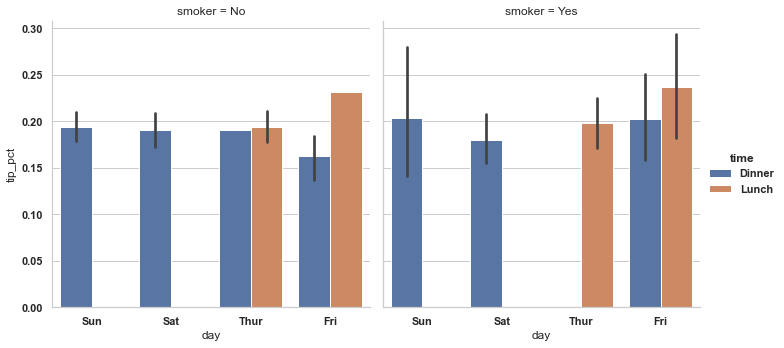

In [222]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

/Users/Shared/anacoda/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


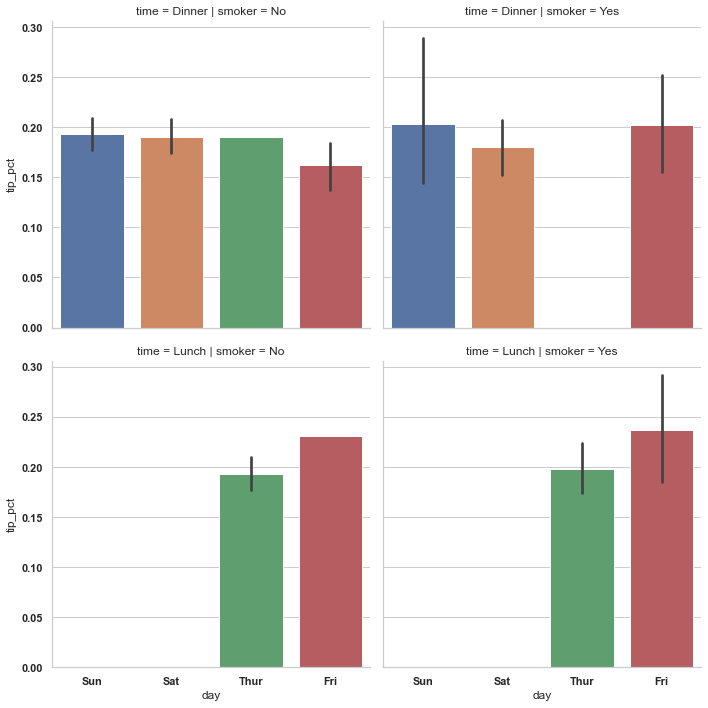

In [223]:
sns.factorplot(x='day', y='tip_pct', row='time',
               col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

## 6.其他Python可视化工具

- [Bokeh](http://bokeh.pydata.orh/)

- [Plotly](https://github.com/plotly/plotly.py)

# 九、时间序列（Time Series）

- 摘自《Python for Data Analysis(Second Edition)》

    - 详见【/Users/mac/Desktop/DS_Python/BasicStuff_Py/数据科学库/pandas初阶知识/时间序列.ipynb】

# 十、pandas高级应用（Advanced pandas）

- 摘自《Python for Data Analysis(Second Edition)》

    - 详见【/Users/mac/Desktop/DS_Python/BasicStuff_Py/数据科学库/pandas高阶应用】

1. 分类数据
2. Python建模库介绍
3. 数据分析示例